## Assignment 3 - model - group 28

In [222]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


**Collecting the data**

In [223]:
# Importing Dataset

data = pd.read_csv("recruitmentdataset-2022-1.3.csv")

**Describe the data**

In [224]:
# Test printing

data.head(10)

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
5,x9063d,female,26,Dutch,Chess,63,False,False,False,False,1,True,bachelor,A,True
6,x5785d,female,27,Dutch,Tennis,63,True,True,False,False,2,True,bachelor,A,False
7,x8767c,female,22,Dutch,Swimming,71,False,True,False,False,1,True,master,A,True
8,x6541b,female,28,Dutch,Football,65,True,False,False,True,3,False,bachelor,A,False
9,x3890b,male,24,Dutch,Football,55,True,False,False,True,3,False,master,A,True


In [225]:
df_company = data[data['company']=='A']
df_company

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
2,x6006e,female,23,Dutch,Running,67,False,True,True,False,0,True,master,A,False
3,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,x2659d,male,30,Dutch,Tennis,54,True,False,False,True,2,False,bachelor,A,False
996,x5868g,male,22,Dutch,Running,69,False,True,False,False,1,True,bachelor,A,False
997,x3164f,male,28,Dutch,Cricket,57,False,False,False,False,1,False,bachelor,A,False
998,x6907b,male,25,Dutch,Tennis,65,False,True,False,False,1,True,master,A,False


In [226]:
filtered_df = df_company[df_company['sport'].str.contains('Swimming|Golf|Football', case=False)]

In [227]:
filtered_df.head(10)

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x8011e,female,24,German,Swimming,70,False,False,False,False,1,True,phd,A,True
1,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
4,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
7,x8767c,female,22,Dutch,Swimming,71,False,True,False,False,1,True,master,A,True
8,x6541b,female,28,Dutch,Football,65,True,False,False,True,3,False,bachelor,A,False
9,x3890b,male,24,Dutch,Football,55,True,False,False,True,3,False,master,A,True
10,x9775f,female,27,Dutch,Football,61,False,False,False,False,1,True,bachelor,A,False
11,x3562f,male,28,Dutch,Football,56,False,False,False,True,2,False,bachelor,A,True
12,x4044c,female,27,German,Football,62,False,True,False,False,1,True,bachelor,A,False
13,x9428d,male,26,Dutch,Football,56,False,False,False,False,1,False,bachelor,A,False


In [228]:
filtered_df.shape

(492, 15)

In [229]:
filtered_df.describe()

,age,ind-university_grade,ind-languages
count,492.000000,492.000000,492.000000
mean,26.247967,61.833333,1.392276
std,2.602579,5.853321,0.848253
min,21.000000,47.000000,0.000000
25%,24.000000,58.000000,1.000000
50%,26.000000,62.000000,1.000000
75%,28.000000,66.000000,2.000000
max,32.000000,77.000000,3.000000


In [230]:
sport_counts = filtered_df['sport'].value_counts()
sport_counts

Football    243
Swimming    163
Golf         86
Name: sport, dtype: int64

In [231]:
nationality_counts = filtered_df['nationality'].value_counts()
nationality_counts

Dutch      367
German      68
Belgian     57
Name: nationality, dtype: int64

In [232]:
hired_counts = filtered_df['decision'].value_counts()
hired_counts

False    277
True     215
Name: decision, dtype: int64

In [233]:
degree_counts = filtered_df['ind-degree'].value_counts()
degree_counts

bachelor    260
master      205
phd          27
Name: ind-degree, dtype: int64

In [234]:
gender_counts = filtered_df['gender'].value_counts()
gender_counts

male      267
female    217
other       8
Name: gender, dtype: int64

In [235]:
languages_counts = filtered_df['ind-languages'].value_counts()
languages_counts

1    210
2    164
0     69
3     49
Name: ind-languages, dtype: int64

**Explore the data**

**Data Preparation**

**Modelling the data**

In [236]:
df_train, df_test = skl.model_selection.train_test_split(filtered_df, test_size=0.20, random_state=9, shuffle=True)
df_train, df_val = skl.model_selection.train_test_split(df_train, test_size=0.20, random_state=9, shuffle=True)
df_train.head()

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
548,x6445e,female,26,German,Golf,56,False,False,False,False,1,False,bachelor,A,False
613,x9736a,male,21,Dutch,Golf,64,False,True,False,True,2,True,bachelor,A,False
475,x7139e,male,32,Dutch,Golf,65,False,False,True,False,0,True,master,A,False
894,x3914e,male,30,Dutch,Football,59,False,False,False,True,2,False,bachelor,A,True
150,x8983a,female,24,Dutch,Football,64,False,False,False,False,2,True,bachelor,A,True


In [237]:
X_train = df_train[['gender','age', 'nationality', 'sport', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp',	'ind-international_exp', 	'ind-languages', 'ind-exact_study',	'ind-degree', 'company']]
y_train = df_train['decision']
X_val = df_val[['gender','age', 'nationality', 'sport', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp',	'ind-international_exp', 	'ind-languages', 'ind-exact_study',	'ind-degree', 'company']]
y_val = df_val['decision']
X_test = df_test[['gender','age', 'nationality', 'sport', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp',	'ind-international_exp', 	'ind-languages', 'ind-exact_study',	'ind-degree', 'company']]
y_test = df_test['decision']

In [238]:
# Define preprocessing steps
categorical_features = ['gender', 'nationality', 'sport', 'ind-degree', 'ind-exact_study']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_features = ['age', 'ind-university_grade', 'ind-debateclub', 'ind-programming_exp', 'ind-international_exp', 'ind-languages']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])

In [239]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'ind-university_grade',
                                                   'ind-debateclub',
                                                   'ind-programming_exp',
                                                   'ind-international_exp',
                                                   'ind-languages']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'nationality',
   

In [240]:

# Define hyperparameters to search
param_grid = {
    'classifier__max_depth': [5, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 3, 4]
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_.named_steps['classifier']

Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.95      0.92       182
        True       0.92      0.83      0.88       132

    accuracy                           0.90       314
   macro avg       0.91      0.89      0.90       314
weighted avg       0.90      0.90      0.90       314



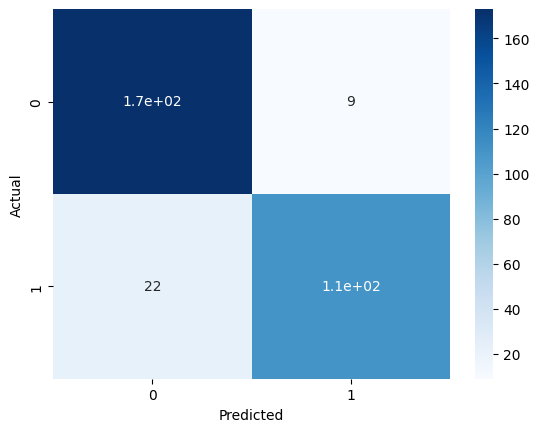

In [241]:
# Make predictions on the training set
y_pred = grid_search.predict(X_train)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_train, y_pred))

sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.77      0.72        43
        True       0.67      0.56      0.61        36

    accuracy                           0.67        79
   macro avg       0.67      0.66      0.66        79
weighted avg       0.67      0.67      0.67        79



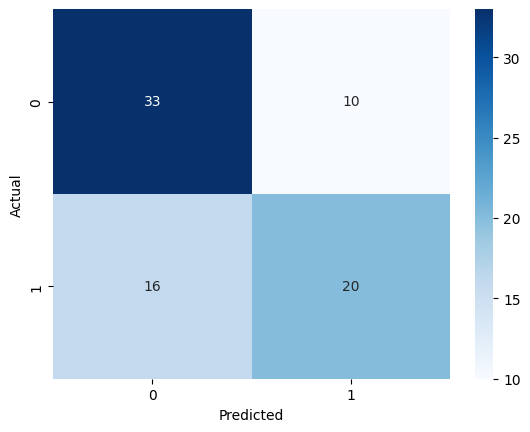

In [243]:
# Make predictions on the validation set
y_pred = grid_search.predict(X_val)

# Generate a classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_val, y_pred))


sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
